### Model Comparison Notebook

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
df_data = pd.read_csv('comparison_data.csv',index_col=0)

In [75]:
our_model_vec = []
baseline_vec = []
for i in range(5):
    our_model_vec.append(df_data[df_data['rock_type'] == df_data['best_model_'+str(i)]].groupby('rock_type')['best_model_'+str(i)].count()/df_data['rock_type'].value_counts()[0])
    baseline_vec.append(df_data[df_data['rock_type'] == df_data['baseline_'+str(i)]].groupby('rock_type')['baseline_'+str(i)].count()/df_data['rock_type'].value_counts()[0])

expert = df_data[df_data['rock_type'] == df_data['pred_app_16021807']].groupby('rock_type')['pred_app_16021807'].count()/df_data['rock_type'].value_counts()[0]

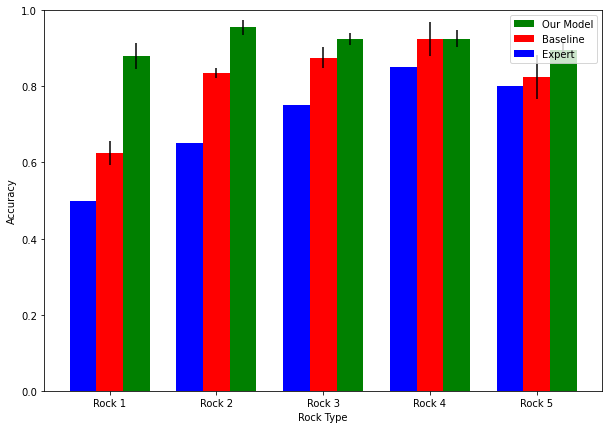

In [76]:
#time_str = 

# # # Figure per rock type 

labels = ['Rock 1','Rock 2','Rock 3','Rock 4','Rock 5']

fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(len(labels))
bar_width = 0.25
ax.bar(index+bar_width+bar_width/2, 
                height=np.array(our_model_vec).mean(axis=0),
                yerr=np.array(our_model_vec).std(axis=0),
                width=bar_width, 
                color='g',
                label='Our Model')

ax.bar(index+bar_width/2, height=np.array(baseline_vec).mean(axis=0), 
                yerr=np.array(baseline_vec).std(axis=0),
                width=bar_width, 
                color='r',
                label='Baseline')
ax.bar(index-bar_width/2, 
                height=expert, 
                width=bar_width,
                color='b',
                label='Expert')
ax.set_xlabel('Rock Type')
ax.set_ylabel('Accuracy')
ax.set_ylim(0,1)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('model_comparison_rock.png',dpi=600)

In [87]:
mean_vec = [expert.mean(),
            np.array(baseline_vec).mean(axis=1).mean(),
            np.array(our_model_vec).mean(axis=1).mean()]

std_vec = [0,
            np.array(baseline_vec).mean(axis=1).std(),
            np.array(our_model_vec).mean(axis=1).std()]

models = ['Expert','Baseline','Our model']

Print mean accuracies and standard deviation

In [92]:
for i in range(3):
    print(f'{models[i]} : {mean_vec[i]} +/- {round(std_vec[i],2)}')

Expert : 0.71 +/- 0
Baseline : 0.817 +/- 0.02
Our model : 0.916 +/- 0.01
